# Problem 2

Use this notebook to write your code for problem 2. You may reuse your SGD code from last week.

In [220]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The following function may be useful for loading the necessary data.

In [221]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    
    Inputs:
        filename: given as a string.
        
    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=',')

In [222]:
def loss(X, Y, w):
    '''
    Calculate the log loss function.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.
    
    Outputs:
        The loss evaluated with respect to X, Y, and w.
    '''
    return np.mean(np.log(1+np.exp(-Y*np.matmul(X,np.transpose(w)))))

def gradient(x, y, w, lamb, N):
    '''
    Calculate the gradient of the regularized loss function with respect to the weight vector w,
    evaluated at a single point (x, y) and weight vector w.
    
    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.
        lamb: lambda
        
    Output:
        The gradient of the loss with respect to w. 
    '''
    return (-y*x)/(np.exp(y*np.matmul(np.transpose(w),x))+1) + 2*lamb/N*w

def SGD(X, Y, w_start, eta, N_epochs, lamb):
    '''
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.
        lamb: lambda
        
    Outputs:
        W: A (N_epochs, D) shaped array containing the weight vectors from all iterations.
        losses: A (N_epochs, ) shaped array containing the losses from all iterations.
    '''
    w = np.array(w_start)
    for i in range(N_epochs):
      shuffle = np.random.permutation(len(X))
      X = X[shuffle]
      Y = Y[shuffle]
      for point in range(len(X)):
        w -= eta*gradient(X[point],Y[point],w,lamb,len(X))
    return w


In [223]:
training1 = load_data('https://raw.githubusercontent.com/charlesincharge/Caltech-CS155-2022/main/sets/set2/data/wine_training1.txt')
training2 = load_data('https://raw.githubusercontent.com/charlesincharge/Caltech-CS155-2022/main/sets/set2/data/wine_training2.txt')
validation = load_data('https://raw.githubusercontent.com/charlesincharge/Caltech-CS155-2022/main/sets/set2/data/wine_validation.txt')

In [224]:
mean1 = np.mean(training1[:,1:], axis=0)
std1 = np.std(training1[:,1:], axis=0)
mean2 = np.mean(training2[:,1:], axis=0)
std2 = np.std(training2[:,1:], axis=0)
X1 = np.insert((training1[:,1:]-mean1)/std1,0,1,axis=1)
Y1 = training1[:,0]
X2 = np.insert((training2[:,1:]-mean2)/std2,0,1,axis=1)
Y2 = training2[:,0]
X_V1 = np.insert((validation[:,1:]-mean1)/std1,0,1,axis=1)
X_V2 = np.insert((validation[:,1:]-mean2)/std2,0,1,axis=1)
Y_V = validation[:,0]

In [225]:
lambdas = [0.00001*5**i for i in range(15)]
N_epochs = 20000
eta = 5e-4
w_start = np.random.rand(14)/100

In [226]:
weights_1 = []
weights_2 = []
for lamb in lambdas:
  w_1 = SGD(X1, Y1, w_start, eta, N_epochs, lamb)
  w_2 = SGD(X2, Y2, w_start, eta, N_epochs, lamb)
  weights_1.append(w_1)
  weights_2.append(w_2)

In [227]:
training_error_1 = [loss(X1, Y1, w) for w in weights_1]
training_error_2 = [loss(X2, Y2, w) for w in weights_2]
testing_error_1 = [loss(X_V1, Y_V, w) for w in weights_1]
testing_error_2 = [loss(X_V2, Y_V, w) for w in weights_2]
l2norm_1 = [np.sqrt(np.matmul(np.transpose(w),w)) for w in weights_1]
l2norm_2 = [np.sqrt(np.matmul(np.transpose(w),w)) for w in weights_2]

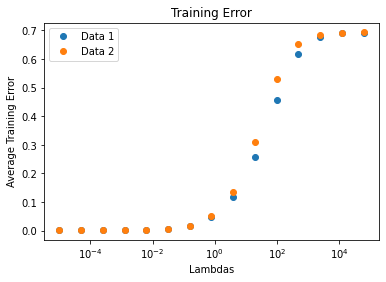

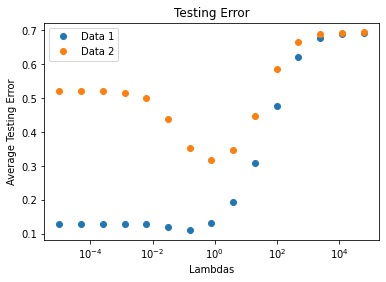

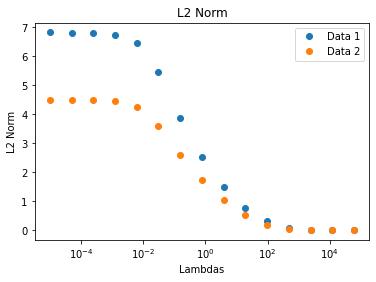

In [228]:
plt.figure()

plt.plot(lambdas, training_error_1, marker = 'o', linewidth = 0)
plt.plot(lambdas, training_error_2, marker = 'o', linewidth = 0)

plt.xscale('log')

plt.legend(['Data 1', 'Data 2'], loc = 'best')
plt.xlabel('Lambdas')
plt.ylabel('Average Training Error')
plt.title('Training Error')

plt.show()

plt.figure()

plt.plot(lambdas, testing_error_1, marker = 'o', linewidth = 0)
plt.plot(lambdas, testing_error_2, marker = 'o', linewidth = 0)

plt.xscale('log')

plt.legend(['Data 1', 'Data 2'], loc = 'best')
plt.xlabel('Lambdas')
plt.ylabel('Average Testing Error')
plt.title('Testing Error')

plt.show()

plt.figure()

plt.plot(lambdas, l2norm_1, marker = 'o', linewidth = 0)
plt.plot(lambdas, l2norm_2, marker = 'o', linewidth = 0)

plt.xscale('log')

plt.legend(['Data 1', 'Data 2'], loc = 'best')
plt.xlabel('Lambdas')
plt.ylabel('L2 Norm')
plt.title('L2 Norm')

plt.show()